<b style="color:Green;font-size:32px;">Technocolabs Machine Learning Internship!</b><br>
<b style="color:#ff3333;font-size:19px;">Project 4 - Fitting a Logistic Regression Model and Directly Using the Coefficients and Creating a Precision-Recall Curve</b><br>
<b style="font-size:19px;color:BlueViolet;">Submitted by Umme Athiya</b><br>
<b style="font-size:17px;">Description of the task:-</b><br>
<ul style="font-size:15px;line-height:10px;"><li><b>Write list comprehensions in Python.</b></li><br>
    <li><b>Describe the workings of logistic regression.</b></li><br>
<li><b>Formulate the sigmoid and logit versions of logistic regression.</b></li><br>
<li><b>Utilize univariate feature selection to find important features.</b></li><br>
<li><b>Customize plots with the Matplotlib API</b></li><br>
<li><b>Characterize the linear decision boundary of a logistic regression</b></li><br>
    <b><li>GitHub Repository Link:- <a>https://github.com/UMMEATHIYA/Technocolabs-ML-Internship</a></li></b>
</ul>

In [1]:
import pandas as pd
import numpy as np
import os 
import math

<h3>First, import your data set and define the sigmoid function</h3>

In [2]:
df = pd.read_csv("cleaned_data.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


<h3>Defining the sigmoid function</h3>

In [3]:
def sigmoid(X):
    Y = 1 / (1 + np.exp(-X))
    return Y

In [4]:
x = df[['PAY_1','LIMIT_BAL']]
y = df['default payment next month']

**Now, create a train/test split (80/20) with `PAY_1` and `LIMIT_BAL` as features and `default payment next month` as values. Use a random state of 24.**

In [5]:
from sklearn.model_selection import train_test_split 
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.3,random_state =80,stratify=y)

In [6]:
print (train_x.shape)
print (train_y.shape)
print (test_x.shape)
print (test_y.shape)

(18664, 2)
(18664,)
(8000, 2)
(8000,)


**Next, import LogisticRegression, with the default options, but set the solver to `'liblinear'`.**


In [7]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=80, solver="liblinear")
model.fit(train_x,train_y)

LogisticRegression(random_state=80, solver='liblinear')

**Now, train on the training data and obtain predicted classes, as well as class probabilities, using the testing data.**

In [8]:
pred_y = model.predict(test_x)

In [9]:
train_set = model.predict_proba(train_x)
train_set

array([[0.73458303, 0.26541697],
       [0.63249464, 0.36750536],
       [0.7723452 , 0.2276548 ],
       ...,
       [0.79532616, 0.20467384],
       [0.9453395 , 0.0546605 ],
       [0.7723452 , 0.2276548 ]])

In [10]:
predict = model.predict_proba(test_x)
predict

array([[0.79532616, 0.20467384],
       [0.78405711, 0.21594289],
       [0.73458303, 0.26541697],
       ...,
       [0.69304649, 0.30695351],
       [0.96749564, 0.03250436],
       [0.82648745, 0.17351255]])

**Then, pull out the coefficients and intercept from the trained model and manually calculate predicted probabilities. You'll need to add a column of 1s to your features, to multiply by the intercept.**

In [11]:
coef = model.coef_
intercept = model.intercept_

In [12]:
manual_y_proba = sigmoid((coef * test_x.values) + intercept)
manual_y_proba

array([[0.5       , 0.20467384],
       [0.5       , 0.21594289],
       [0.5       , 0.26541697],
       ...,
       [0.5       , 0.30695351],
       [0.5       , 0.03250436],
       [0.5       , 0.17351255]])

In [13]:
threshold = 0.5
manual_y_pred = []

for i in manual_y_proba[:, 1]:
    if i >= threshold:
        manual_y_pred.append(1)
    else:
        manual_y_pred.append(0)

manual_y_pred = np.asarray(manual_y_pred)        

manual_y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
pos = pred_y == 1
neg = pred_y == 0
manual_pos = manual_y_pred == 1
manual_neg = manual_y_pred == 0
print(f"Positives = {sum(pos)} and Negatives = {sum(neg)} are predicted classes.")
print(f"Positives = {sum(manual_pos)} and Negatives = {sum(manual_neg)} are manually predicted classes.")

Positives = 0 and Negatives = 8000 are predicted classes.
Positives = 0 and Negatives = 8000 are manually predicted classes.


In [15]:
from sklearn import metrics
print(f"predicted probabilities: {metrics.roc_auc_score(test_y, predict[:, 1])}")

predicted probabilities: 0.6355692895668634


In [16]:
print(f"manually predicted probabilities: {metrics.roc_auc_score(test_y, manual_y_proba[:, 1])}")

manually predicted probabilities: 0.6285220704099005


Text(0.5, 1.0, 'The sigmoid function')

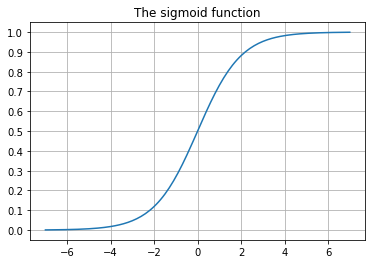

In [17]:
import matplotlib.pyplot as plt
X_sig = np.linspace(-7,7,141)
Y_sig = sigmoid(X_sig)
plt.plot(X_sig,Y_sig)
plt.yticks(np.linspace(0,1,11))
plt.grid()
plt.title('The sigmoid function')

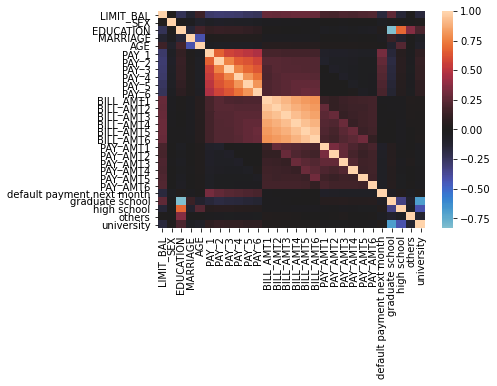

In [18]:
import seaborn as sns
corr=df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            center=0)

In [19]:
overall_default_rate = df['default payment next month'].mean()
overall_default_rate

0.2217971797179718

In [22]:
group_by_pay_mean_y = df.groupby('PAY_1').agg({'default payment next month':np.mean})
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455
